In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PSID
from PSID.evaluation import evalPrediction
from src.explore_state_dimensions import explore_latent_behavior_dims, plot_explorations

In [2]:
# explore dimensions of behaviorally relevant dynamics
# in here all latent space dimensions will be used to prioritize behavior, meaning n1 = nx

PATH_FEATURES = "/home/lauraflyra/Documents/BCCN/Lab_Rotation_USC/Code/Data/py_neuromodulation_derivatives/sub-000_ses-right_task-force_run-3/sub-000_ses-right_task-force_run-3_FEATURES.csv"
data_features = pd.read_csv(PATH_FEATURES, index_col=0)

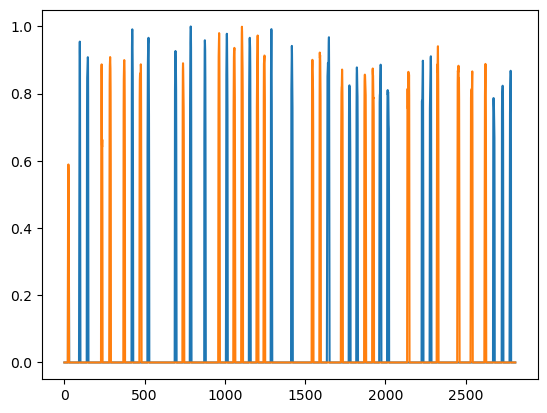

In [3]:
plt.plot(data_features["MOV_RIGHT_CLEAN"])
plt.plot(data_features["MOV_LEFT_CLEAN"])

In [4]:
from cross_validation_PSID import cross_validation, cross_validation_split

In [5]:
feature_df = pd.concat([data_features.filter(like='LFP'),data_features.filter(like='ECOG')], axis = 1).filter(like='bandpass_activity').to_numpy()
behavior_df_comb = pd.concat([data_features["MOV_LEFT_CLEAN"], data_features["MOV_RIGHT_CLEAN"]], axis = 1).to_numpy()

behavior_df_right = data_features["MOV_RIGHT_CLEAN"].to_numpy().reshape(-1, 1)
behavior_df_left = data_features["MOV_LEFT_CLEAN"].to_numpy().reshape(-1, 1)

In [6]:
K_FOLDS = 5
N_DIMS = 15
MAX_DIM = 30

In [7]:
eval_over_dims_comb, behavior_dims_latent = explore_latent_behavior_dims(feature_df, behavior_df_comb, k_folds=K_FOLDS, n_dims=N_DIMS, max_dim=MAX_DIM, i=MAX_DIM, cv_eval='R2')

Behavior decoding evaluation:
  PSID => 0.153
Behavior decoding evaluation:
  PSID => 0.254
Behavior decoding evaluation:
  PSID => 0.226
Behavior decoding evaluation:
  PSID => 0.215
Behavior decoding evaluation:
  PSID => 0.118
Behavior decoding evaluation:
  PSID => 0.314
Behavior decoding evaluation:
  PSID => 0.357
Behavior decoding evaluation:
  PSID => 0.339
Behavior decoding evaluation:
  PSID => 0.399
Behavior decoding evaluation:
  PSID => 0.284
Behavior decoding evaluation:
  PSID => 0.38
Behavior decoding evaluation:
  PSID => 0.443
Behavior decoding evaluation:
  PSID => 0.403
Behavior decoding evaluation:
  PSID => 0.45
Behavior decoding evaluation:
  PSID => 0.308
Behavior decoding evaluation:
  PSID => 0.479
Behavior decoding evaluation:
  PSID => 0.51
Behavior decoding evaluation:
  PSID => 0.516
Behavior decoding evaluation:
  PSID => 0.518
Behavior decoding evaluation:
  PSID => 0.385
Behavior decoding evaluation:
  PSID => 0.491
Behavior decoding evaluation:
  PSID 

In [8]:
eval_over_dims_right, behavior_dims_latent = explore_latent_behavior_dims(feature_df, behavior_df_right, k_folds=K_FOLDS, n_dims=N_DIMS, max_dim=MAX_DIM, i=MAX_DIM, cv_eval='R2')

Behavior decoding evaluation:
  PSID => 0.258
Behavior decoding evaluation:
  PSID => 0.187
Behavior decoding evaluation:
  PSID => 0.207
Behavior decoding evaluation:
  PSID => 0.316
Behavior decoding evaluation:
  PSID => -0.0113
Behavior decoding evaluation:
  PSID => 0.342
Behavior decoding evaluation:
  PSID => 0.349
Behavior decoding evaluation:
  PSID => 0.379
Behavior decoding evaluation:
  PSID => 0.4
Behavior decoding evaluation:
  PSID => 0.107
Behavior decoding evaluation:
  PSID => 0.377
Behavior decoding evaluation:
  PSID => 0.386
Behavior decoding evaluation:
  PSID => 0.44
Behavior decoding evaluation:
  PSID => 0.455
Behavior decoding evaluation:
  PSID => 0.141
Behavior decoding evaluation:
  PSID => 0.355
Behavior decoding evaluation:
  PSID => 0.381
Behavior decoding evaluation:
  PSID => 0.479
Behavior decoding evaluation:
  PSID => 0.451
Behavior decoding evaluation:
  PSID => 0.146
Behavior decoding evaluation:
  PSID => 0.361
Behavior decoding evaluation:
  PSI

In [9]:
eval_over_dims_left, behavior_dims_latent = explore_latent_behavior_dims(feature_df, behavior_df_left, k_folds=K_FOLDS, n_dims=N_DIMS, max_dim=MAX_DIM, i=MAX_DIM, cv_eval='R2')

Behavior decoding evaluation:
  PSID => 0.253
Behavior decoding evaluation:
  PSID => 0.412
Behavior decoding evaluation:
  PSID => 0.387
Behavior decoding evaluation:
  PSID => 0.397
Behavior decoding evaluation:
  PSID => 0.504
Behavior decoding evaluation:
  PSID => 0.605
Behavior decoding evaluation:
  PSID => 0.678
Behavior decoding evaluation:
  PSID => 0.642
Behavior decoding evaluation:
  PSID => 0.608
Behavior decoding evaluation:
  PSID => 0.631
Behavior decoding evaluation:
  PSID => 0.618
Behavior decoding evaluation:
  PSID => 0.708
Behavior decoding evaluation:
  PSID => 0.663
Behavior decoding evaluation:
  PSID => 0.608
Behavior decoding evaluation:
  PSID => 0.645
Behavior decoding evaluation:
  PSID => 0.603
Behavior decoding evaluation:
  PSID => 0.698
Behavior decoding evaluation:
  PSID => 0.683
Behavior decoding evaluation:
  PSID => 0.6
Behavior decoding evaluation:
  PSID => 0.631
Behavior decoding evaluation:
  PSID => 0.609
Behavior decoding evaluation:
  PSID

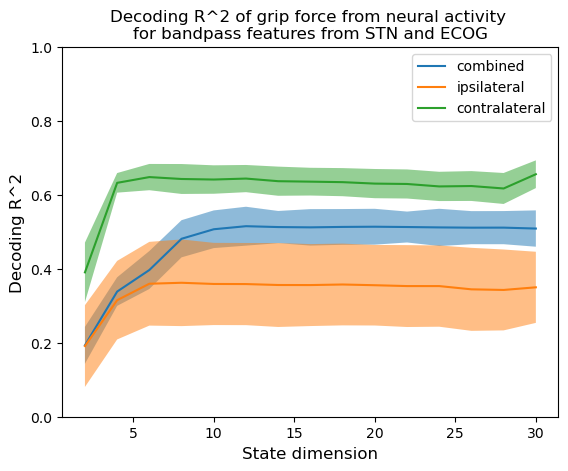

In [12]:
plt.plot(behavior_dims_latent, np.mean(eval_over_dims_comb, axis = 1), label = 'combined')
plt.fill_between(behavior_dims_latent, np.mean(eval_over_dims_comb, axis = 1) - np.std(eval_over_dims_comb, axis = 1), np.mean(eval_over_dims_comb, axis = 1) + np.std(eval_over_dims_comb, axis = 1), alpha = 0.5)
plt.plot(behavior_dims_latent, np.mean(eval_over_dims_right, axis=1), label = 'ipsilateral')
plt.fill_between(behavior_dims_latent, np.mean(eval_over_dims_right, axis=1) - np.std(eval_over_dims_right, axis=1),
                 np.mean(eval_over_dims_right, axis=1) + np.std(eval_over_dims_right, axis=1), alpha=0.5)
plt.plot(behavior_dims_latent, np.mean(eval_over_dims_left, axis=1), label = 'contralateral')
plt.fill_between(behavior_dims_latent, np.mean(eval_over_dims_left, axis=1) - np.std(eval_over_dims_left, axis=1),
                 np.mean(eval_over_dims_left, axis=1) + np.std(eval_over_dims_left, axis=1), alpha=0.5)
plt.ylim(0,1)
plt.legend()
plt.ylabel("Decoding R^2", fontsize = 12)
plt.xlabel("State dimension", fontsize = 12)
plt.title("Decoding R^2 of grip force from neural activity \nfor bandpass features from STN and ECOG", fontsize = 12)
plt.show()

# Change the way hand decoding is done, check overleaf notes

In [9]:
comb_behavior = (np.asarray(data_features["MOV_LEFT_CLEAN"] > 0.7, dtype = int)-1*np.asarray(data_features["MOV_RIGHT_CLEAN"] > 0.7)).reshape(-1, 1)
feature_df = pd.concat([data_features.filter(like='LFP'),data_features.filter(like='ECOG')], axis = 1).filter(like='bandpass_activity').to_numpy()

Behavior decoding r2:
  PSID => 0.354


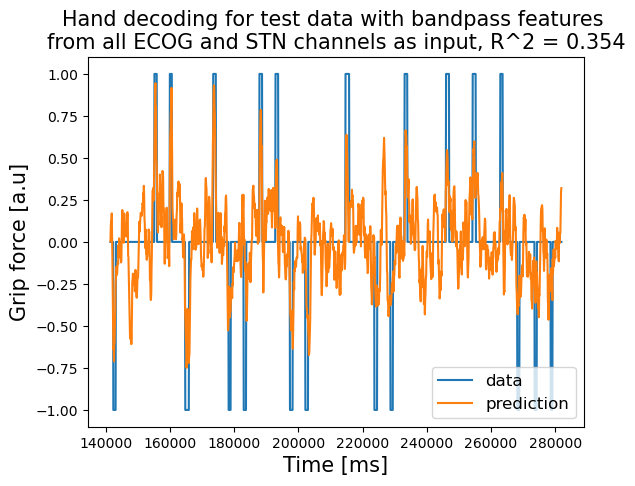

In [13]:
train_idx_features = np.arange(np.round(0.5 * data_features.shape[0]), dtype=int)
test_idx_features = np.arange(1 + train_idx_features[-1], data_features.shape[0])

feat_train = feature_df[train_idx_features]
feat_test =feature_df[test_idx_features]
mov_features_train = comb_behavior[train_idx_features]
mov_features_test = comb_behavior[test_idx_features]

idSys = PSID.PSID(feat_train, mov_features_train, 10,  10, 10)

mov_features_test_pred, feat_test_pred, x_feat_test_pred = idSys.predict(feat_test)

r2_feat = evalPrediction(mov_features_test, mov_features_test_pred, "R2")

print('Behavior decoding r2:\n  PSID => {:.3g}'.format(np.mean(r2_feat)))

time_array = data_features['time'].to_numpy().reshape(-1, 1)[test_idx_features]
plt.plot(time_array, mov_features_test.reshape(-1,), label = 'data')
plt.plot(time_array, mov_features_test_pred.reshape(-1,), label = 'prediction')
plt.title("Hand decoding for test data with bandpass features \nfrom all ECOG and STN channels as input, R^2 = {:.3g}".format(np.mean(r2_feat)), fontsize = 15)
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Grip force [a.u]", fontsize = 15)
plt.legend(fontsize = 12)
plt.show()


# sub-003

In [3]:
PATH_FEATURES_S3 = "/home/lauraflyra/Documents/BCCN/Lab_Rotation_USC/Code/Data/py_neuromodulation_derivatives/sub-003_ses-right_task-force_run-4/sub-003_ses-right_task-force_run-4_FEATURES.csv"
data_features_s3 = pd.read_csv(PATH_FEATURES_S3, index_col=0)

In [6]:
data_features_s3.filter(like="bandpass_activity")[1:]

,STN_RIGHT_0-STN_RIGHT_2_bandpass_activity_theta,STN_RIGHT_0-STN_RIGHT_2_bandpass_activity_alpha,STN_RIGHT_0-STN_RIGHT_2_bandpass_activity_low beta,STN_RIGHT_0-STN_RIGHT_2_bandpass_activity_high beta,STN_RIGHT_0-STN_RIGHT_2_bandpass_activity_low gamma,STN_RIGHT_0-STN_RIGHT_2_bandpass_activity_high gamma,STN_RIGHT_0-STN_RIGHT_2_bandpass_activity_HFA,STN_RIGHT_1-STN_RIGHT_0_bandpass_activity_theta,STN_RIGHT_1-STN_RIGHT_0_bandpass_activity_alpha,STN_RIGHT_1-STN_RIGHT_0_bandpass_activity_low beta,...,gridcortex_13_bandpass_activity_HFA,gridcortex_16_bandpass_activity_HFA,gridcortex_19_bandpass_activity_HFA,gridcortex_20_bandpass_activity_HFA,gridcortex_23_bandpass_activity_HFA,gridcortex_24_bandpass_activity_HFA,gridcortex_27_bandpass_activity_HFA,gridcortex_28_bandpass_activity_HFA,gridcortex_32_bandpass_activity_HFA,gridcortex_33_bandpass_activity_HFA
1,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,...,0.167969,-0.206676,-0.064391,0.005617,0.030157,0.217104,0.357673,0.366738,0.296402,1.000000
2,0.047684,-0.483243,-1.067219,1.378860,1.244810,-0.226373,0.283830,0.827431,0.699605,-1.346637,...,0.916621,0.461433,0.742274,0.439949,-0.180475,-0.079233,-0.440304,-0.865167,-0.837191,-1.117053
3,-0.134676,-0.965653,-0.866227,-0.648843,-0.985813,-0.452649,0.586951,0.689443,-0.414134,-1.650235,...,0.692492,-0.080349,0.865393,1.620078,1.254883,1.231378,0.963887,0.717171,0.763766,0.297662
4,-1.482997,-1.239841,-1.743770,-1.587454,-1.742673,-1.720191,-1.716872,0.453641,0.180788,-1.492006,...,0.650589,0.026728,0.447738,0.558063,0.713336,0.875746,1.090279,1.188999,1.113930,1.864877
5,-1.311310,-1.668497,-1.022989,1.449211,-0.237312,0.529011,0.340646,-1.842105,-1.759736,-1.400942,...,0.469672,0.420357,0.211006,0.111111,-0.568975,-0.445381,-0.832829,-1.299061,-1.272968,-1.533987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,1.390921,-0.048836,-0.816589,1.100019,-0.740032,0.994713,-0.296262,1.553076,0.044577,-1.801149,...,0.614138,0.575639,0.749672,0.539340,0.510576,0.508085,0.486594,0.467189,0.471090,0.432059
1666,0.694360,0.520737,-0.078394,1.122532,-0.320658,1.180560,1.170146,1.458011,0.630308,0.712241,...,0.490049,-0.194759,1.073452,1.721173,1.392405,1.327091,1.057080,0.836763,0.894717,0.314973
1667,0.948157,0.488641,1.640810,0.675646,1.237192,1.998185,1.798608,1.447702,1.130365,1.735641,...,0.359935,-0.001756,0.849075,1.296252,1.050260,1.016735,0.824854,0.659386,0.697186,0.319057
1668,0.586224,1.392134,1.666485,1.145579,0.074486,-0.573652,-1.768071,1.492189,1.428726,1.871393,...,-0.011520,-0.292588,0.451435,0.750231,0.741973,0.710230,0.683540,0.679226,0.691595,0.567862
